In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading dataset from /content/drive/MyDrive/Datasets/Processed_Visa_Dataset.csv...
------------------------------
GENERATING INSIGHTS REPORT
------------------------------
1. Processing Time Summary:
   - Average Wait: 725.6 days
   - Median Wait:  686.0 days
   -> Chart saved: output_charts/1_processing_time_dist.png
   -> Chart saved: output_charts/2_state_status_dist.png

2. Impact of Education on Case Status:
CASE_STATUS        Certified  Denied
MINIMUM_EDUCATION                   
Associate's             15.0    85.0
Bachelor's              40.9    58.4
Doctorate               17.6    82.4
High School             26.2    73.8
Master's                28.6    71.0
Other                   81.5    18.5
Unknown                 19.8    70.9
   -> Chart saved: output_charts/3_education_impact.png
   -> Chart saved: output_charts/4_seasonal_trends.png

3. Wage vs. Time Correlation: -0.066
   (Insight: Salary level has very little impact on speed of processing)
   -> Chart saved: output_ch

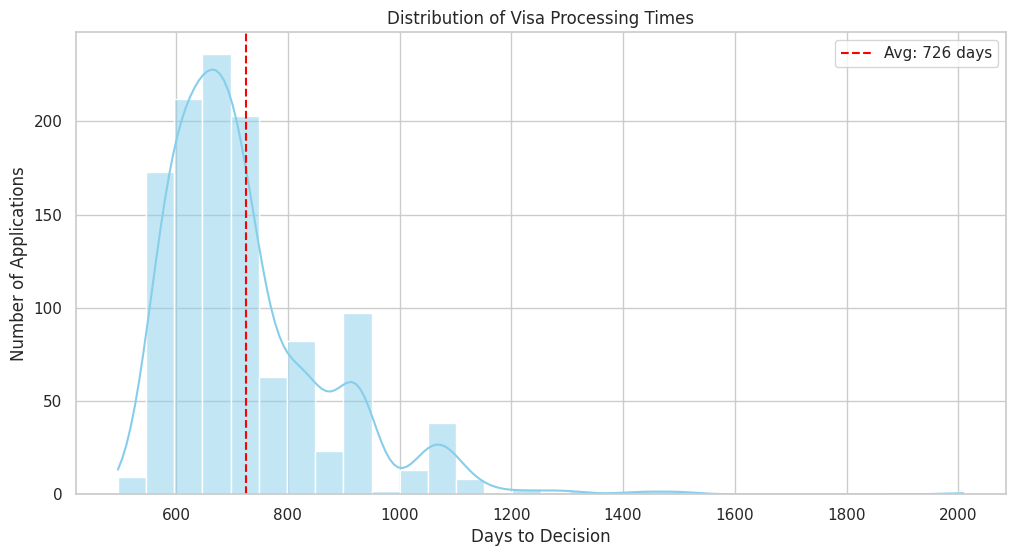

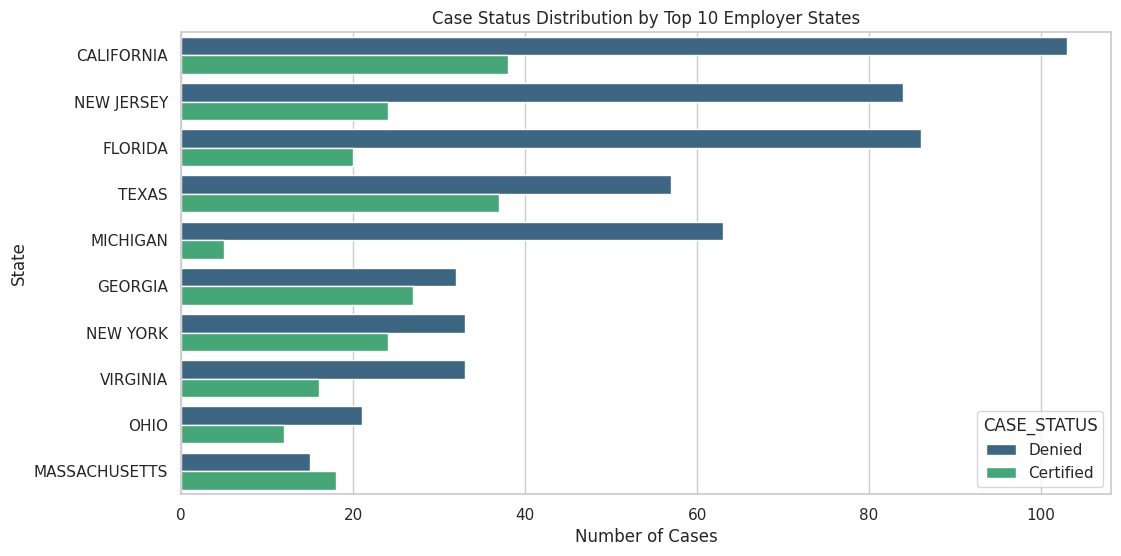

<Figure size 1200x600 with 0 Axes>

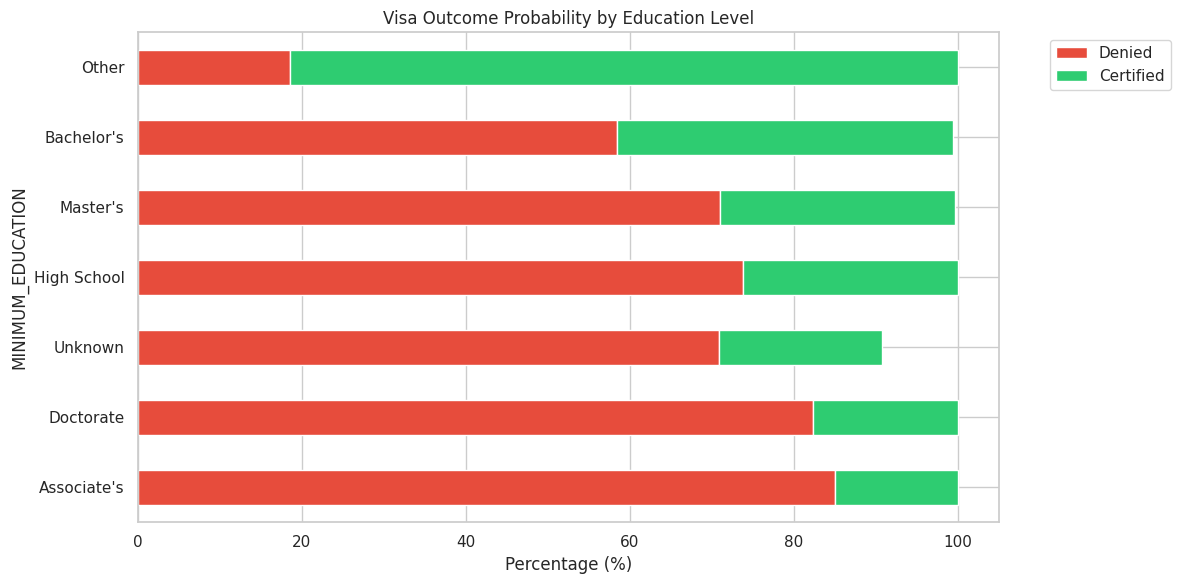

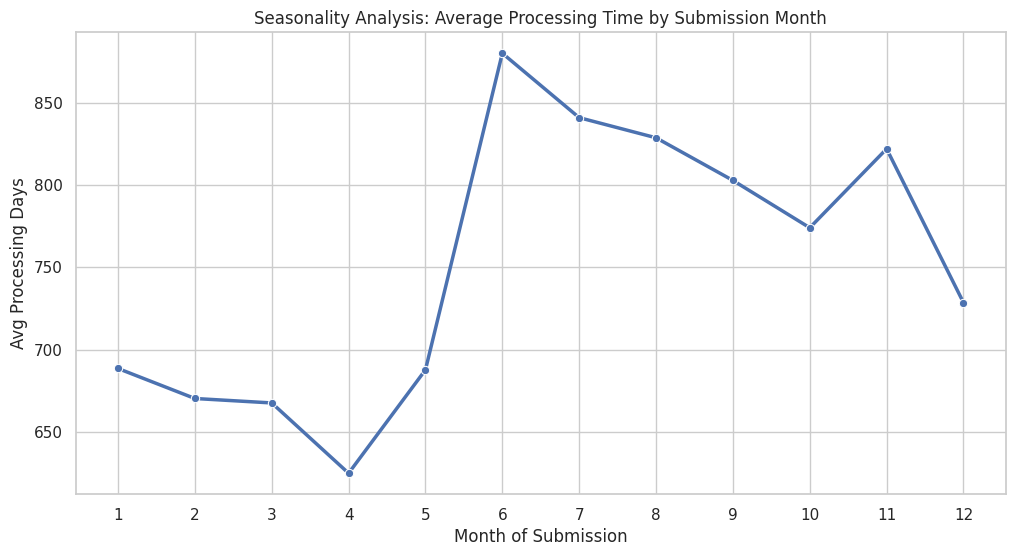

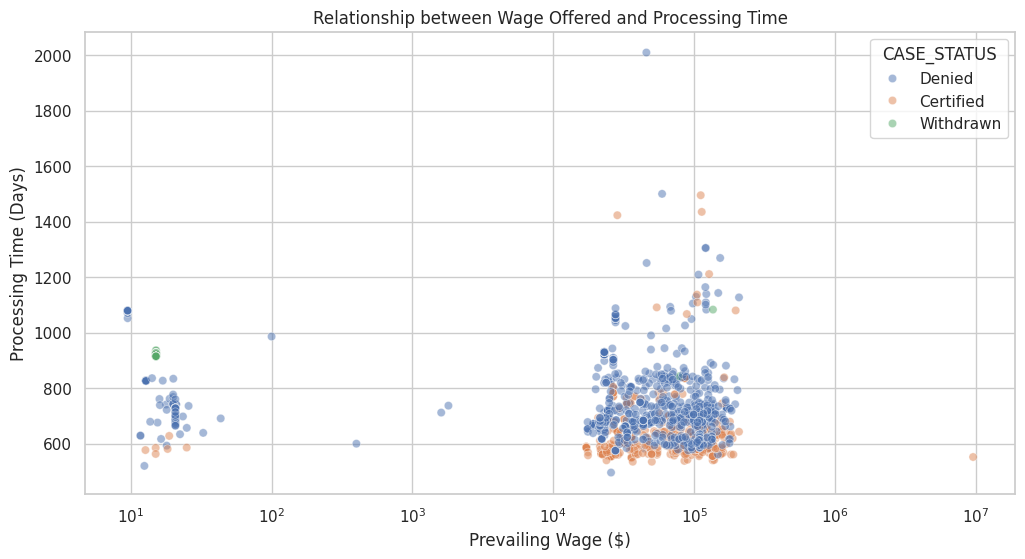

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def run_eda_analysis(input_file):
    print(f"Loading dataset from {input_file}...")

    if not os.path.exists(input_file):
        print(f"Error: {input_file} not found. Please run the Milestone 1 script first.")
        return

    df = pd.read_csv(input_file)

    # Create an 'output_charts' directory
    os.makedirs('output_charts', exist_ok=True)

    print("-" * 30)
    print("GENERATING INSIGHTS REPORT")
    print("-" * 30)

    # --- Insight 1: Processing Time Distribution ---
    avg_time = df['PROCESSING_TIME_DAYS'].mean()
    median_time = df['PROCESSING_TIME_DAYS'].median()
    print(f"1. Processing Time Summary:")
    print(f"   - Average Wait: {avg_time:.1f} days")
    print(f"   - Median Wait:  {median_time:.1f} days")

    plt.figure()
    sns.histplot(df['PROCESSING_TIME_DAYS'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Visa Processing Times')
    plt.xlabel('Days to Decision')
    plt.ylabel('Number of Applications')
    plt.axvline(avg_time, color='red', linestyle='--', label=f'Avg: {avg_time:.0f} days')
    plt.legend()
    plt.savefig('output_charts/1_processing_time_dist.png')
    print("   -> Chart saved: output_charts/1_processing_time_dist.png")

    # --- Insight 2: Denial Rates by Top States ---
    # Filter for Certified/Denied only to get clean rates
    df_status = df[df['CASE_STATUS'].isin(['Certified', 'Denied'])]

    # Get top 10 states by volume
    top_states = df_status['EMPLOYER_STATE_PROVINCE'].value_counts().nlargest(10).index
    df_top_states = df_status[df_status['EMPLOYER_STATE_PROVINCE'].isin(top_states)]

    plt.figure()
    sns.countplot(data=df_top_states, y='EMPLOYER_STATE_PROVINCE', hue='CASE_STATUS', order=top_states, palette='viridis')
    plt.title('Case Status Distribution by Top 10 Employer States')
    plt.xlabel('Number of Cases')
    plt.ylabel('State')
    plt.savefig('output_charts/2_state_status_dist.png')
    print("   -> Chart saved: output_charts/2_state_status_dist.png")

    # --- Insight 3: Impact of Education on Outcome ---
    print("\n2. Impact of Education on Case Status:")
    ct = pd.crosstab(df['MINIMUM_EDUCATION'], df['CASE_STATUS'], normalize='index') * 100
    print(ct[['Certified', 'Denied']].round(1))

    plt.figure()
    # Sort by 'Certified' rate for better visuals
    if 'Certified' in ct.columns:
        ct_sorted = ct.sort_values('Certified', ascending=True)
        ct_sorted[['Denied', 'Certified']].plot(kind='barh', stacked=True, color=['#e74c3c', '#2ecc71'])
        plt.title('Visa Outcome Probability by Education Level')
        plt.xlabel('Percentage (%)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig('output_charts/3_education_impact.png')
        print("   -> Chart saved: output_charts/3_education_impact.png")
    else:
        print("   (Skipping chart 3: 'Certified' status not found in sample)")

    # --- Insight 4: Seasonal Trends in Processing Time ---
    seasonal_data = df.groupby('SUBMISSION_MONTH')['PROCESSING_TIME_DAYS'].mean().reset_index()

    plt.figure()
    sns.lineplot(data=seasonal_data, x='SUBMISSION_MONTH', y='PROCESSING_TIME_DAYS', marker='o', linewidth=2.5)
    plt.title('Seasonality Analysis: Average Processing Time by Submission Month')
    plt.xlabel('Month of Submission')
    plt.ylabel('Avg Processing Days')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.savefig('output_charts/4_seasonal_trends.png')
    print("   -> Chart saved: output_charts/4_seasonal_trends.png")

    # --- Insight 5: Wage vs Processing Time Correlation ---
    # Is there a correlation between higher pay and faster processing?
    corr = df['PW_WAGE'].corr(df['PROCESSING_TIME_DAYS'])
    print(f"\n3. Wage vs. Time Correlation: {corr:.3f}")
    if abs(corr) < 0.1:
        print("   (Insight: Salary level has very little impact on speed of processing)")

    plt.figure()
    sns.scatterplot(data=df, x='PW_WAGE', y='PROCESSING_TIME_DAYS', alpha=0.5, hue='CASE_STATUS')
    plt.title('Relationship between Wage Offered and Processing Time')
    plt.xlabel('Prevailing Wage ($)')
    plt.ylabel('Processing Time (Days)')
    plt.xscale('log') # Log scale because wages vary wildly
    plt.savefig('output_charts/5_wage_vs_time.png')
    print("   -> Chart saved: output_charts/5_wage_vs_time.png")

    print("-" * 30)
    print("Milestone 2 Analysis Complete.")
    print("All visualizations have been saved to the 'output_charts' folder.")

if __name__ == "__main__":
    # Ensure this matches the output file from Milestone 1
    input_csv = '/content/drive/MyDrive/Datasets/Processed_Visa_Dataset.csv'
    run_eda_analysis(input_csv)

--- Processing Time Statistics ---
count    1171.000000
mean      725.619129
std       147.414040
min       496.000000
25%       623.000000
50%       686.000000
75%       782.500000
max      2009.000000
Name: PROCESSING_TIME_DAYS, dtype: float64


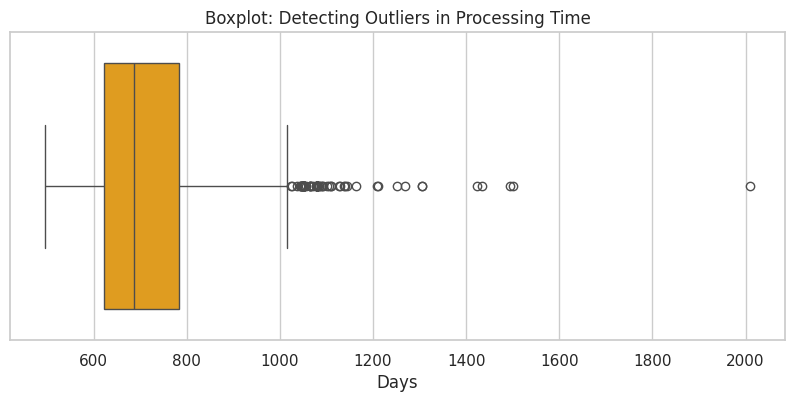

In [ ]:
df = pd.read_csv(input_file)
# 1. Statistical Summary
print("--- Processing Time Statistics ---")
print(df['PROCESSING_TIME_DAYS'].describe())


# 3. Boxplot (Outlier Detection)
# This helps us see the extreme delays
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['PROCESSING_TIME_DAYS'], color='orange')
plt.title('Boxplot: Detecting Outliers in Processing Time')
plt.xlabel('Days')
plt.show()